# Mobile Ad Anti-Fraud Algorithm Challenge Modeling (rf, lightgbm)

## 移动广告反欺诈算法挑战赛 数据建模 - 2019 科大讯飞 A.I.开发者挑战赛

-- Date:   25 Aug 2019  
-- Author:   Arianna.H

___

## 5.Modeling

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  #display multiple outputs in one cell

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #plot

from sklearn.model_selection import train_test_split  #split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier
#from sklearn import svm  #svm
from catboost import CatBoostClassifier  #catboost
import lightgbm as lgb  #lightgbm

pd.set_option('display.max_columns', 1000)  #display all columns in dataframe
pd.set_option('display.max_rows', 1000)  #display all rows in dataframe

In [3]:
df = pd.read_csv('round1_iflyad_anticheat_train_clean.csv')

In [4]:
df.shape
df.head(3)

(1000000, 41)

,label,pkgname,adunitshowid,mediashowid,apptype,city,province,adidmd5,imeimd5,idfamd5,openudidmd5,macmd5,dvctype,model,make,ntt,carrier,os,orientation,lan,h,w,ppi,date,dayofweek,hour,minute,hourtosecond,ip_top,reqrealip_top,apptype_top1,apptype_top2,h_w,hw_ratio,inch,osv_top1,osv_top2,osv_top3,ver_top1,ver_top2,ver_top3
0,1,226,907,645,280.0,229,17,407,930,0,0,962,2.0,6202,816,2.0,46000.0,0,0.0,9,2340.0,1080.0,3.0,9,7,14,31,143141,183,180,2,28,2527200.0,2.2,859.1,8,81,810,1,11,111
1,1,0,101,325,319.0,119,18,466,638,0,466,60,2.0,602,332,5.0,0.0,1,0.0,6,1080.0,2040.0,0.0,9,7,3,25,32540,106,47,3,31,2203200.0,0.5,0.0,9,9,9,0,0,0
2,0,168,832,728,273.0,296,5,340,342,0,0,511,2.0,4816,572,2.0,46000.0,0,1.0,9,2196.0,1080.0,0.0,9,7,14,5,140545,223,39,2,27,2371680.0,2.0,0.0,8,81,810,3,32,321


___

### Split train and validation set

In [7]:
traindata_x = df.drop(['label'],axis=1)
traindata_y = df['label']
x_train,x_test,y_train,y_test = train_test_split(traindata_x,traindata_y,train_size=.9,random_state=20,shuffle=True)

In [8]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(900000, 40) (900000,) (100000, 40) (100000,)


### Tune RandomForest Model

Best parameters by rf: {'min_samples_leaf': 2, 'n_estimators': 500, cv=3}  
Best f1 score is : 0.932953

In [36]:
# Set the parameters by cross-validation
parameter_space = {
    "n_estimators": [50,100],  
    "min_samples_leaf": [2,4,6]
}
 
scores = ['f1_macro']

# training    
print("# Tuning hyper-parameters for %s" % scores)
print()

clf = RandomForestClassifier(random_state=20, verbose=1)
grid = GridSearchCV(clf, parameter_space, cv=3, scoring='%s' % score, n_jobs=4, verbose=1) 
grid.fit(x_train, y_train)

# print results
print("Grid scores on development set:")
print()

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

print()
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

# Tuning hyper-parameters for ['f1_macro']

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.6s finished
[Parallel(n_j

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=20,
                                              verbose=1, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

Grid scores on development set:

0.923 (+/-0.001) for {'min_samples_leaf': 2, 'n_estimators': 50}
0.924 (+/-0.002) for {'min_samples_leaf': 2, 'n_estimators': 100}
0.922 (+/-0.002) for {'min_samples_leaf': 4, 'n_estimators': 50}
0.923 (+/-0.002) for {'min_samples_leaf': 4, 'n_estimators': 100}
0.921 (+/-0.002) for {'min_samples_leaf': 6, 'n_estimators': 50}
0.921 (+/-0.002) for {'min_samples_leaf': 6, 'n_estimators': 100}

Best parameters set found on development set:

{'min_samples_leaf': 2, 'n_estimators': 100}


### Fit GridSearch model with best parameters

In [37]:
# fit best estimator {'min_samples_leaf': 2, 'n_estimators': 100}
bclf = grid.best_estimator_
bclf.fit(x_train, y_train)
y_true = y_test
y_pred = bclf.predict(x_test)
y_pred_pro = bclf.predict_proba(x_test)
y_scores = pd.DataFrame(y_pred_pro, columns=bclf.classes_.tolist())[1].values

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.0min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20, verbose=1,
                       warm_start=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.2s finished


### or... fit a RandomForestClassifier

In [105]:
# train RandomForestClassifier
tclf = RandomForestClassifier(n_estimators=500, min_samples_leaf=2, random_state=20, n_jobs=4, verbose=1)
md = tclf.fit(x_train, y_train)
y_pred_t = md.predict(x_test)

### Evaluation Metrics

In [38]:
# precision, recall, f1 score
p = precision_score(y_true, y_pred, average='binary')
r = recall_score(y_true, y_pred, average='binary')
f1score = f1_score(y_true, y_pred, average='binary')
 
print('precision_score: %s'% p)
print('recall_score: %s'% r)
print('f1_score: %s'% f1score)
print()
print(classification_report(y_true, y_pred))

precision_score: 0.9416607015032212
recall_score: 0.9236917103795795
f1_score: 0.9325896580483737

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     51578
           1       0.94      0.92      0.93     48422

    accuracy                           0.94    100000
   macro avg       0.94      0.93      0.94    100000
weighted avg       0.94      0.94      0.94    100000



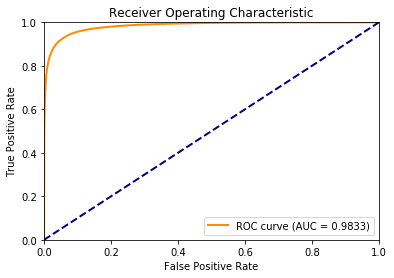

In [39]:
# plot ROC curve
auc_value = roc_auc_score(y_true, y_scores)
fpr, tpr, thresholds = roc_curve(y_true, y_scores, pos_label=1.0)

_ = plt.figure()
lw = 2
_ = plt.plot(fpr, tpr, color='darkorange', linewidth=lw, label='ROC curve (AUC = %0.4f)' % auc_value)
_ = plt.plot([0, 1], [0, 1], color='navy', linewidth=lw, linestyle='--')
_ = plt.xlim([0.0, 1.0])
_ = plt.ylim([0.0, 1.0])
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Receiver Operating Characteristic')
_ = plt.legend(loc="lower right")
_ = plt.show()

In [40]:
# feature importance
features = df.columns[1:]
importances = bclf.feature_importances_
indices = np.argsort(importances)

feature_importance = pd.DataFrame()
feature_importance['features'] = features
feature_importance['importances'] = importances
feature_importance.sort_values(by='importances',ascending=False).head(10)
#feature_importance.sort_values(by='importances',ascending=False).features.head(10)

# for name, importance in zip(features, importances):
#     print(name, "=", importance)

,features,importances
32,hw_ratio,0.103679
13,make,0.070076
34,osv_top1,0.061514
11,dvctype,0.055653
12,model,0.053382
35,osv_top2,0.041739
2,mediashowid,0.038484
3,apptype,0.038272
36,osv_top3,0.035865
30,apptype_top2,0.035042


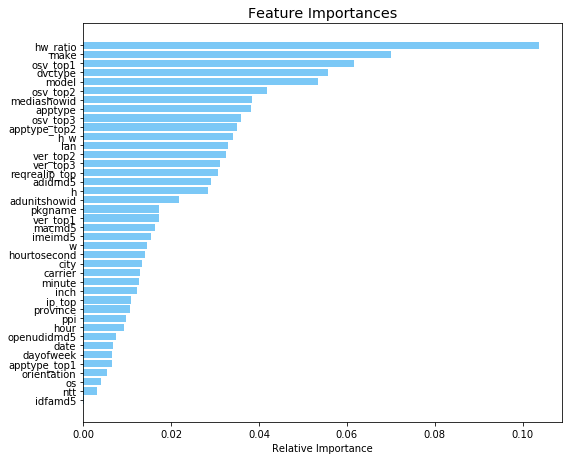

In [75]:
# plot feature importance
fig = plt.figure()
fig.set_size_inches(8,6.5)
_ = plt.title('Feature Importances', fontsize='x-large')
_ = plt.barh(range(len(indices)), importances[indices], color='xkcd:lightblue', align='center')
_ = plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize='medium')
_ = plt.xlabel('Relative Importance')
fig.tight_layout()
plt.show()

____

## Tune Lightgbm Model

Grid scores by lightgbm:
  
Best parameters found by grid search are: {boosting_type='gbdt', 'learning_rate': 0.05, 'n_estimators': 3000, cv=3} ('dart' overfit)  
Best f1_macro score is: 0.9367622501566735  
elapsed: 87.6min finished  

In [101]:
# Set the parameters by cross-validation
params_opt = {
    'n_estimators': [1000,3000], 
    'learning_rate': [0.05,0.07]
}

model = lgb.LGBMClassifier( 
    boosting_type="gbdt",
    objective='binary',
    metric='binary_logloss',
    lambda_l1=0.2,
    num_leaves=31, 
    min_data_in_leaf=30,
    feature_fraction=0.5,  
    bagging_fraction=0.8, 
    bagging_freq=15,
    random_state=20,
)

# training
print('Starting tuning hyper-parameters...')
gbm = GridSearchCV(estimator = model, 
    param_grid = params_opt, 
    scoring='f1_macro',
    n_jobs=4, 
    verbose=1,
    cv=3)
gbm.fit(x_train, y_train)

# print out parameters
print("Grid scores on development set:")
print()
means = gbm.cv_results_['mean_test_score']
stds = gbm.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gbm.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))     
print()
print('Best parameters found by grid search are: %s' % gbm.best_params_)
print('Best f1_macro score is: %s' % gbm.best_score_)

Starting tuning hyper-parameters...
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed: 87.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=15,
                                      boosting_type='dart', class_weight=None,
                                      colsample_bytree=1.0,
                                      feature_fraction=0.5,
                                      importance_type='split', lambda_l1=0.2,
                                      learning_rate=0.1, max_depth=-1,
                                      metric='binary_logloss',
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_data_in_leaf=30,...gain=0.0,
                                      n_estimators=100, n_jobs=-1,
                                      num_leaves=31, objective='binary',
                                      random_state=20, reg_alpha=0.0,
                                      reg_lambda=0.0, sil

Grid scores on development set:

0.937 (+/-0.000) for {'learning_rate': 0.05, 'n_estimators': 3000}

Best parameters found by grid search are: {'learning_rate': 0.05, 'n_estimators': 3000}
Best f1_macro score is: 0.9367622501566735


### or.. fit a LGBMClassifier

In [ ]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)


params_opt = {
    'n_estimators': [3000], 
    'learning_rate': [0.05]
}

model = lgb.LGBMClassifier( 
    boosting_type="dart",
    objective='binary',
    metric='binary_logloss',
    lambda_l1=0.2,
    num_leaves=31, 
    min_data_in_leaf=30,
    feature_fraction=0.5,  
    bagging_fraction=0.8, 
    bagging_freq=15,
    random_state=20
)


# train
gbm = lgb.LGBMClassifier(boosting_type="dart",
                         objective='binary',
                         metric='binary_logloss',
                         learning_rate=0.05,
                         n_estimators=3000,
                         lambda_l1=0.2,
                         num_leaves=31,
                         min_data_in_leaf=30,
                         feature_fraction=0.5,  
                         bagging_fraction=0.8, 
                         bagging_freq=15,
                         random_state=20)
gbm.fit(lgb_train, valid_sets=lgb_eval, 
        eval_metric='l1',
        early_stopping_rounds=5)

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
# eval
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

# feature importances
print('Feature importances:', list(gbm.feature_importances_))


### Another version for training lightgbm with more details

In [104]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

#print('Best parameters found by grid search are:', gbm.best_params_)
# specify your configurations as a dict
params = {
'task': 'train',
'objective': 'binary',
'metric': 'binary_logloss',
'boosting': 'gbdt', 
'num_threads': 5,
'num_iterations': 3000,
'learning_rate': 0.07, 
'feature_fraction': 0.9,
'bagging_fraction': 0.8,
'bagging_freq': 50,
'min_data_in_leaf': 30, 
'random_seed':20,
'verbose':1
}


print('Start training...')

# train
gbm = lgb.train(params=gbm.best_params_, lgb_train, valid_sets=lgb_eval, early_stopping_rounds=100)
print('Save model...')

# save model to file
gbm.save_model('lightgbm/model.txt')
print('Start predicting...')

# predict
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)

# eval
print(y_pred)
print('The roc of prediction is:', roc_auc_score(y_test, y_pred) )
print('Dump model to JSON...')

# dump model to json (and save to file)
model_json = gbm.dump_model()
with open('lightgbm/model.json', 'w+') as f:
    json.dump(model_json, f, indent=4)
    

# feature importances
gbm.feature_name()
gbm.feature_importance()

___